In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import toeplitz

# Ex.1

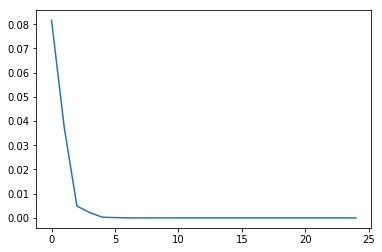

In [12]:
A = np.array([[0.3, 0.6, 0.1],
             [0.5, 0.2, 0.3],
             [0.4, 0.1, 0.5]])

v = np.array([1/3, 1/3, 1/3])

v_new = None

x = []
y = []
for step in range(25):
    v_new = np.dot(v, A)
    x.append(step)
    y.append(np.linalg.norm(v_new - v))
    v = v_new

plt.plot(x, y)
plt.show()

# Ex. 2

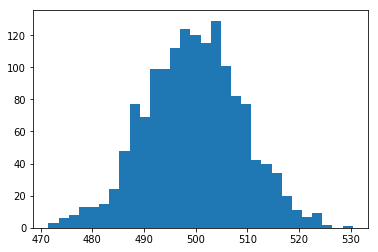

In [13]:
Y = []
N = 2000

for _ in range(1500):
    Y.append(np.sum(np.random.uniform(0, 1, (1000, ))))

plt.hist(Y, bins=30)
plt.show()

# Ex. 3

In [39]:
mnist = pd.read_csv('train.csv')

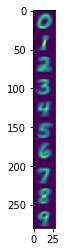

In [40]:
M = mnist.as_matrix()
labels = M[:,0]
pixels = M[:,1:]
result_imgs = []
for i in range(10):
    same_label_rows = pixels[labels == i]
    label_mean = same_label_rows.mean(axis=0)
    label_mean_img = label_mean.reshape(28, 28)
    result_imgs.append(label_mean_img)

plt.imshow(np.vstack(result_imgs))

# Ex. 4

In [45]:
def loop_rotate(matrix):
    h, w = matrix.shape
    rotated_matrix = np.zeros((w, h))
    index = 0
    for i in range(w):
        for j in range(h-1, -1, -1):
            new_y = int(index / w)
            new_x = int(index % w)
            rotated_matrix[new_y][new_x] = matrix[j][i]
            index += 1
    return rotated_matrix

def numpy_rotate(matrix):
    return np.rot90(matrix, axes=(1,0))

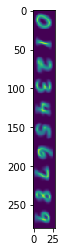

In [55]:
loop_rotated_result_imgs = []
for img in result_imgs:
    loop_rotated_result_imgs.append(loop_rotate(img))
plt.imshow(np.vstack(loop_rotated_result_imgs))

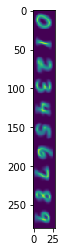

In [54]:
np_rotated_result_imgs = []
for img in result_imgs:
    np_rotated_result_imgs.append(numpy_rotate(img))
plt.imshow(np.vstack(np_rotated_result_imgs))

# Ex. 5

In [63]:
def is_symmetric(matrix):
    h, w = matrix.shape
    for i in range(w):
        for j in range(h):
            if not matrix[i][j] == matrix[j][i]:
                return False
    return True

def np_is_symmetric(matrix):
    return np.array_equal(matrix, np.transpose(matrix))

In [69]:
# A is symmetric
A = toeplitz([1,2,3,4,5])
print(is_symmetric(A))
print(np_is_symmetric(A))

True
True


# Ex. 6

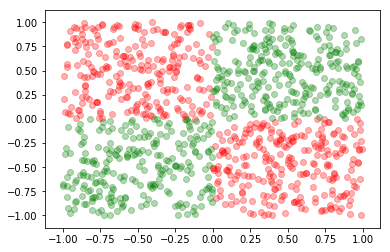

In [143]:
def xor_ops(a, b):
    if a * b >= 0:
        return 0
    else:
        return 1

x = np.random.uniform(-1, 1, (1000,))
y = np.random.uniform(-1, 1, (1000,))
labels = np.array([xor_ops(x[i],y[i]) for i in range(len(x))])
color_map = {1: 'red', 0: 'green'}
for v in [1, 0]:
    index = (labels == v)
    plt.scatter(x[index], y[index], c=color_map[v], alpha=0.3)
plt.show()

# Ex. 7

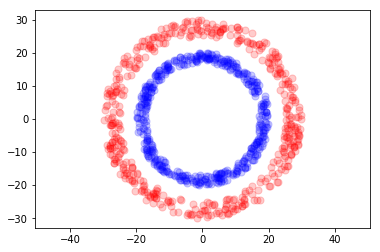

In [145]:
def circle_dataset(radius, margin):
    x = np.random.uniform(-radius, radius, 2000)
    y = np.random.uniform(-radius, radius, 2000)
    s = np.sqrt(x**2 + y**2)
    index = (s < radius) == (s > radius -  margin)
    return x[index], y[index]

x1, y1 = circle_dataset(30, 5)
plt.axis('equal')
plt.scatter(x1, y1,s=50, c='red', alpha=0.2)
x2, y2 = circle_dataset(20, 3)
plt.scatter(x2, y2,s=50, c='blue', alpha=0.2)
plt.show()

# Ex. 8

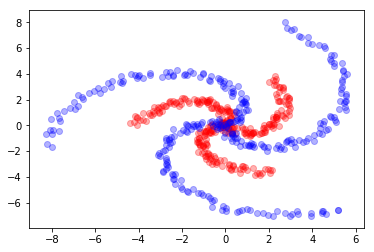

In [116]:
sin = math.sin
cos = math.cos
radians = math.radians

def spiral_dataset(a, t, start, no_spiral):
    x = []
    y = []
    delta = 360 / no_spiral
    curent = start
    for _ in range(no_spiral):
        for i in np.linspace(0, t, 100):
            rt = a * radians(i)
            x.append(rt * cos(radians(i) + radians(curent)) + np.random.uniform(-0.3, 0.3))
            y.append(rt * sin(radians(i) + radians(curent)) + np.random.uniform(-0.3, 0.3))
        curent += delta
    return x, y

x1, y1 = spiral_dataset(2, 120, 180, 3)
plt.scatter(x1, y1, alpha=0.3, c="red")
x2, y2 = spiral_dataset(3, 160, 270, 3)
plt.scatter(x2, y2, alpha=0.3, c="blue")
plt.show()

# Ex. 9

In [141]:
x1, y1 = spiral_dataset(2, 120, 180, 3)
x2, y2 = spiral_dataset(3, 160, 270, 3)
part1 = np.c_[x1, y1, np.ones(len(x1))]
part2 = np.c_[x2, y2, np.zeros(len(x2))]
dataset = np.r_[part1, part2]
np.random.shuffle(dataset)

df = pd.DataFrame(dataset)
df.columns = ['x1', 'x2', 'y']
df.to_csv('spiral.csv')

In [143]:
df

,x1,x2,y
0,0.060032,-0.548202,0.0
1,2.551931,0.350869,1.0
2,-2.595192,-2.966266,0.0
3,0.082970,0.071000,1.0
4,-3.369699,0.654906,1.0
5,0.212463,-0.618477,0.0
6,-1.299589,2.031135,1.0
7,-2.945293,-2.276321,0.0
8,0.100549,-2.953341,1.0
9,3.839168,-1.222208,0.0
